# main

In [10]:
!python main.py

100%|█████████████████████████████████| 500000/500000 [07:48<00:00, 1068.30it/s]
train: count500001
100%|█████████████████████████████████████| 1118/1118 [00:00<00:00, 1231.33it/s]
valid: count1119


# check output

In [3]:
!python check_lmdb.py train

500000
(615, 394)
{'chart-type': 'dot',
 'count': 12,
 'data-series': [{'x': '44 to 49', 'y': 7},
                 {'x': '42 to 49', 'y': 8},
                 {'x': '41 to 49', 'y': 1},
                 {'x': '37 to 44', 'y': 8},
                 {'x': '43 to 46', 'y': 8},
                 {'x': '42 to 45', 'y': 6},
                 {'x': '68 to 74', 'y': 4},
                 {'x': '61 to 68', 'y': 8},
                 {'x': '49 to 55', 'y': 9},
                 {'x': '39 to 48', 'y': 5},
                 {'x': '39 to 47', 'y': 3},
                 {'x': '37 to 45', 'y': 9}],
 'id': 'graphs_d_1',
 'image-size': {'height': 394, 'width': 615},
 'source': 'bartley_1'}
(656, 464)
{'chart-type': 'vertical_bar',
 'count': 10,
 'data-series': [{'x': '1 to 5', 'y': 60},
                 {'x': '12 to 18', 'y': 20},
                 {'x': '35 to 40', 'y': 50},
                 {'x': '15 to 17', 'y': 0},
                 {'x': '15 to 18', 'y': 30},
                 {'x': '43 to 49', 'y': 10},
   

500000
{'chart-type': 'scatter',
 'count': 61,
 'data-series': [{'x': 0, 'y': 0.5},
                 {'x': 0, 'y': 0.0},
                 {'x': 2, 'y': 0.1},
                 {'x': 2, 'y': 0.5},
                 {'x': 2, 'y': 0.3},
                 {'x': 2, 'y': 0.4},
                 {'x': 2, 'y': 0.4},
                 {'x': 3, 'y': 0.4},
                 {'x': 3, 'y': 0.0},
                 {'x': 3, 'y': 0.5},
                 {'x': 4, 'y': 0.2},
                 {'x': 4, 'y': 0.2},
                 {'x': 4, 'y': 0.4},
                 {'x': 5, 'y': 0.3},
                 {'x': 6, 'y': 0.2},
                 {'x': 8, 'y': 0.3},
                 {'x': 8, 'y': 0.1},
                 {'x': 8, 'y': 0.1},
                 {'x': 8, 'y': 0.5},
                 {'x': 9, 'y': 0.4},
                 {'x': 9, 'y': 0.5},
                 {'x': 10, 'y': 0.3},
                 {'x': 10, 'y': 0.5},
                 {'x': 11, 'y': 0.4},
                 {'x': 12, 'y': 0.1},
                 {'x': 1

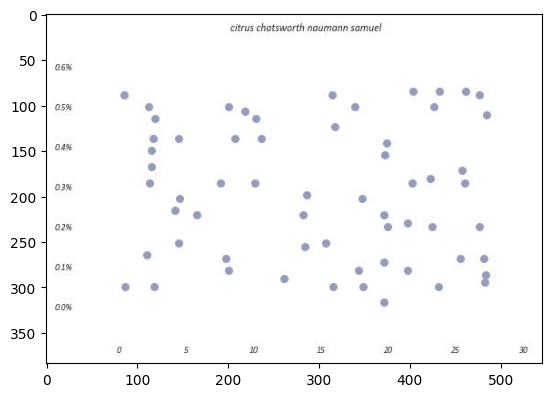

In [14]:
from pathlib import Path
import json
from pprint import pprint
import lmdb
import six
from PIL import Image
import matplotlib.pyplot as plt

phase = 'train'
ROOT_DIR = Path.cwd().parents[2]
EXP_NAME = Path.cwd().stem
LMDB_DIR = ROOT_DIR / 'data' / EXP_NAME / phase / 'lmdb'

env = lmdb.open(str(LMDB_DIR), max_readers=32, readonly=True,
                lock=False, readahead=False, meminit=False)

with env.begin(write=False) as txn:
    n_samples = int(txn.get('num-samples'.encode()))
    print(n_samples)
    for i in [300002]:
        i += 1

        # image
        img_key = f'image-{str(i).zfill(8)}'.encode()
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')
        plt.imshow(img)

        # json
        label_key = f'label-{str(i).zfill(8)}'.encode()
        label = txn.get(label_key).decode('utf-8')
        json_dict = json.loads(label)
        pprint(json_dict)